# **GRU Exercise**

## Import libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)/ LAB/Dataset/traffic.csv


In [26]:
df = pd.read_csv('/content/traffic-2.csv',index_col='DateTime', parse_dates=True)
# dataframe['DateTime'] = dataframe['DateTime'].apply(lambda x: x.timestamp())
# dataset = dataframe.values
# dataset = dataset.astype('float32')

## Data Exploration



In [27]:
df.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48120 entries, 2015-11-01 00:00:00 to 2017-06-30 23:00:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Junction  48120 non-null  int64
 1   Vehicles  48120 non-null  int64
 2   ID        48120 non-null  int64
dtypes: int64(3)
memory usage: 1.5 MB


In [29]:
df.isna().sum()

,0
Junction,0
Vehicles,0
ID,0


In [30]:
df.duplicated().sum()

0

In [11]:
df

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041
...,...,...,...
2017-06-30 19:00:00,4,11,20170630194
2017-06-30 20:00:00,4,30,20170630204
2017-06-30 21:00:00,4,16,20170630214


In [31]:
# Convert the data to a numpy array
data = df.values

In [32]:
# Scale the data using Min-Max Scaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [33]:
# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.80)
test_size = len(data_scaled) - train_size
train_data, test_data = data_scaled[0:train_size], data_scaled[train_size:len(data_scaled)]


In [35]:
lookback = 24  # number of time steps to look back
X_train, y_train = split_data(train_data, lookback)
X_test, y_test = split_data(test_data, lookback)


In [36]:
# Reshape the data for the GRU model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Feature Engineering (if needed)



## Exploratory Data Analysis


## split into train and test sets

In [37]:
# Split the data into input (X) and output (y) variables
def split_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback, 0])
        y.append(data[i+lookback, 0])
    return np.array(X), np.array(y)



## Model Building



In [40]:
# Build the GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(GRU(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

## Fitting The Model



In [41]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - loss: 0.0059 - val_loss: 1.2703e-04
Epoch 2/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - loss: 6.3440e-04 - val_loss: 4.6332e-05
Epoch 3/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - loss: 4.7929e-04 - val_loss: 3.5163e-04
Epoch 4/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - loss: 4.1979e-04 - val_loss: 6.1913e-05
Epoch 5/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - loss: 3.9226e-04 - val_loss: 0.0011
Epoch 6/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - loss: 3.9305e-04 - val_loss: 1.5482e-04
Epoch 7/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - loss: 3.8961e-04 - val_loss: 2.7124e-05
Epoch 8/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - loss: 3.8652e-04 - val_loss: 1.9376e-04
Epoch 9/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - loss: 3.8694e-04 - val_loss: 2.3005e-05
Epoch 10/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - loss: 3.7567e-04 - val_loss: 2.2530e-04
Epoch 11/20
1203/1203 ━━━━━

## Make preductuion and evaluatuin matrix.

In [43]:
# Make predictions on the testing data
predictions = model.predict(X_test)

300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [44]:
# Evaluate the model using various metrics


# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse:.2f}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae:.2f}')

# R-Squared (R2)
r2 = r2_score(y_test, predictions)
print(f'R2: {r2:.2f}')

MSE: 0.00
MAE: 0.00
R2: 1.00


## Visualize the result

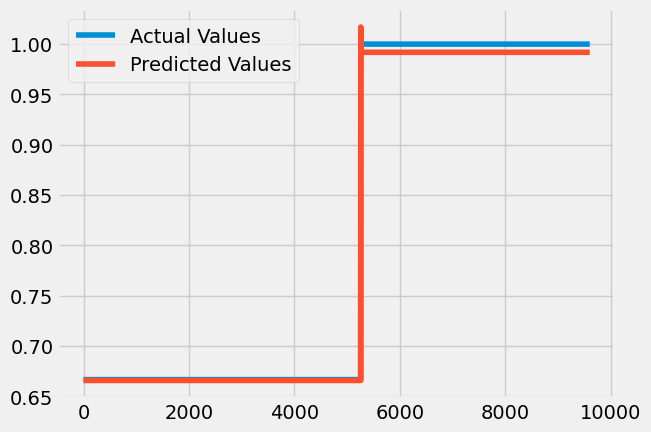

In [45]:
import matplotlib.pyplot as plt

# Plot the predicted values vs. actual values
plt.plot(y_test, label='Actual Values')
plt.plot(predictions, label='Predicted Values')
plt.legend()
plt.show()

# **Well done** :)